In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#read the CSV file into a pandas dataframe

df = pd.read_csv("~/Desktop/Nitrogenous-Fate-Project/intermediates/NFEX_particulate_BMISed_areas.csv")
df.head(5)


,filename,compound_name,bmised_area
0,230810_Std_4uMStdsMix1InH2O_1,"Glycine betaine 0(15N), 0(13C)",4.994966e+09
1,230810_Std_4uMStdsMix1InH2O_2,"Glycine betaine 0(15N), 0(13C)",5.310851e+09
2,230810_Std_4uMStdsMix1InH2O_3,"Glycine betaine 0(15N), 0(13C)",7.330021e+09
3,230810_Std_4uMStdsMix1InMatrix_1,"Glycine betaine 0(15N), 0(13C)",2.492732e+09
4,230810_Std_4uMStdsMix1InMatrix_2,"Glycine betaine 0(15N), 0(13C)",2.567423e+09


In [14]:
# Filtering and data transformation
final_samplepeaks = df[df['filename'].str.startswith("230810_Smp_G5_NFEX_T")].copy()  # Make a copy
final_samplepeaks['day'] = final_samplepeaks['filename'].str.extract(r'T(\d+)')
final_samplepeaks['time'] = pd.to_numeric(final_samplepeaks['day'].str.replace('T', ''))

# Specific hours
specific_hours = [0, 6, 12, 24]

final_samplepeaks.head(5)


,filename,compound_name,bmised_area,day,time
30,230810_Smp_G5_NFEX_T0_Metab_A,"Glycine betaine 0(15N), 0(13C)",4.969379e+09,0,0
31,230810_Smp_G5_NFEX_T0_Metab_B,"Glycine betaine 0(15N), 0(13C)",4.822591e+09,0,0
32,230810_Smp_G5_NFEX_T0_Metab_C,"Glycine betaine 0(15N), 0(13C)",4.979965e+09,0,0
33,230810_Smp_G5_NFEX_T6_NH4_Metab_A,"Glycine betaine 0(15N), 0(13C)",2.282865e+09,6,6
34,230810_Smp_G5_NFEX_T6_NH4_Metab_B,"Glycine betaine 0(15N), 0(13C)",2.870576e+09,6,6


/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sgarcia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

AttributeError: 'FacetGrid' object has no attribute 'set_visible'

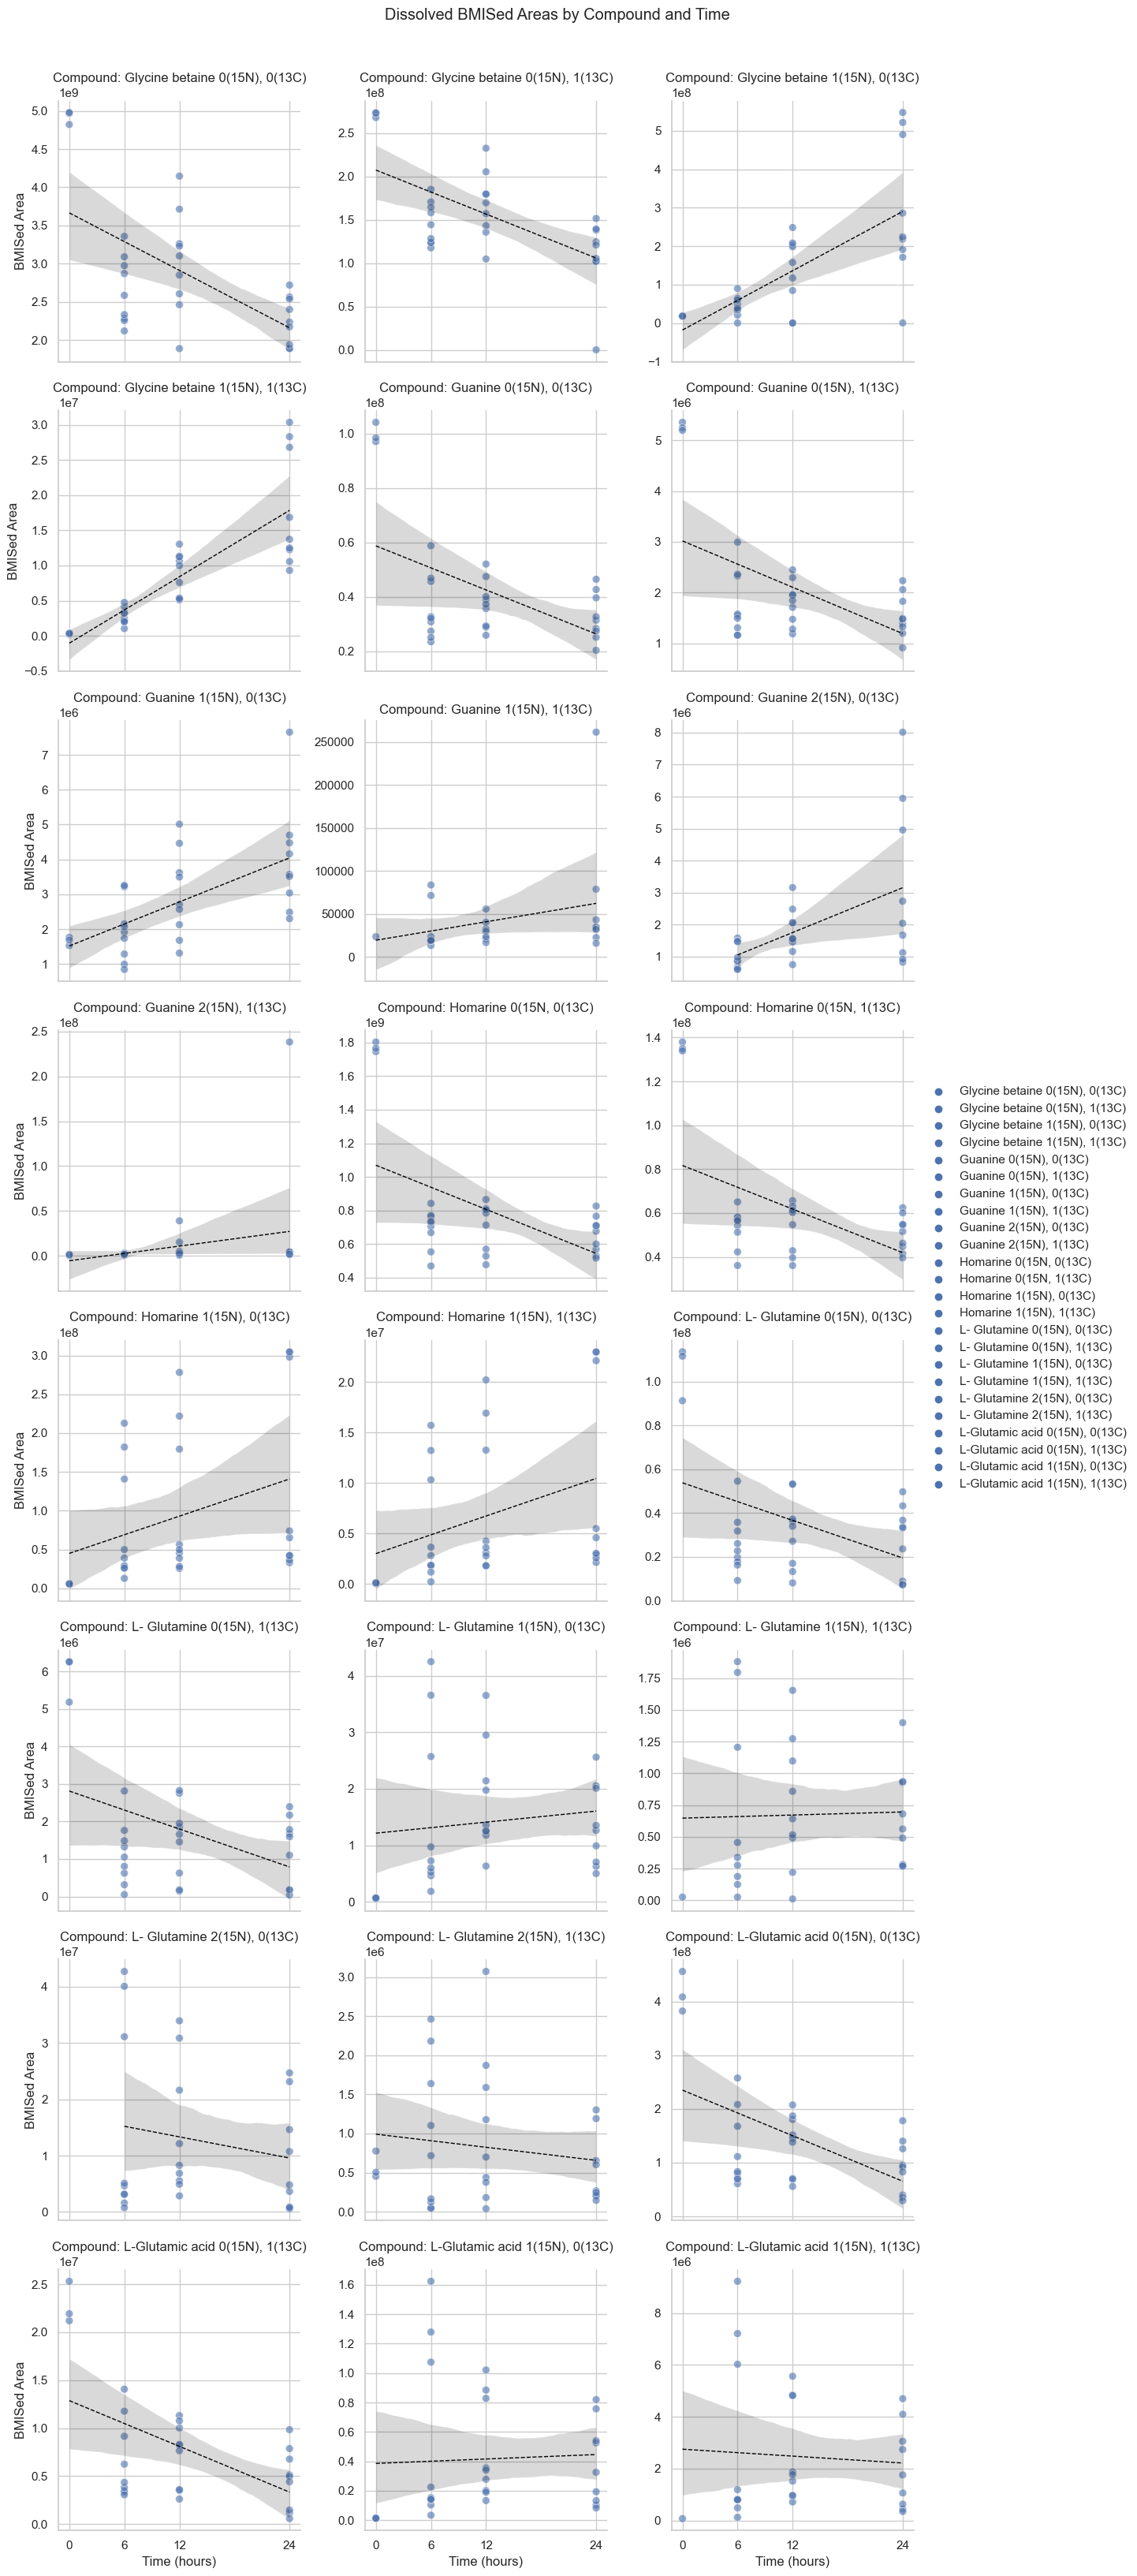

In [12]:
# Plotting using seaborn and matplotlib
sns.set_theme(style="whitegrid")

g = sns.FacetGrid(final_samplepeaks, col="compound_name", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.scatterplot, x="time", y="bmised_area", hue="compound_name", s=50, alpha=0.6)
g.map_dataframe(sns.regplot, x="time", y="bmised_area", scatter=False, color="black", line_kws={"linestyle": "--", "linewidth": 1})
g.set_axis_labels("Time (hours)", "BMISed Area")
g.set_titles("Compound: {col_name}")
g.set(xticks=specific_hours)
g.fig.suptitle("Dissolved BMISed Areas by Compound and Time", y=1.02)
g.add_legend().set_visible(False)

plt.show()


